# TASK 03 : NUMBER RECOGNITION

LIBRARIES

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

LOADING OF DATASET

In [4]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 14s 1us/step


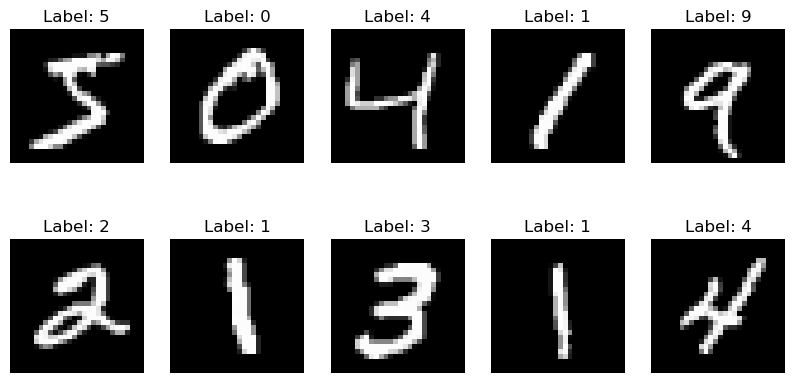

In [6]:
# Display the first 10 images from the training set along with their labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

PREPROCESS THE DATASET

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

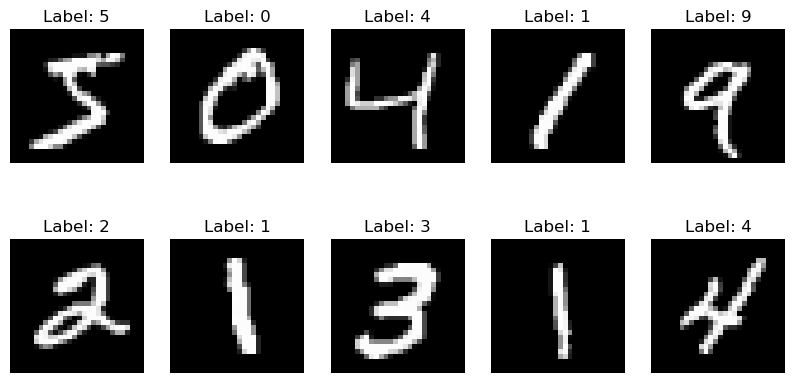

In [11]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.squeeze(train_images[i]), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [12]:
# Convert the labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

CREATION OF NEURAL NETWORK MODEL

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

MODEL TRAINING AND EVALUATION

In [16]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 121s 64ms/step - loss: 0.1748 - accuracy: 0.9444
Epoch 2/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0497 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0329 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0246 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 64s 68ms/step - loss: 0.0189 - accuracy: 0.9942


In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 30s 11ms/step - loss: 0.0303 - accuracy: 0.9912
Test accuracy: 0.9911999702453613


VISUALIZATION OF PREDICTION

In [20]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 9ms/step


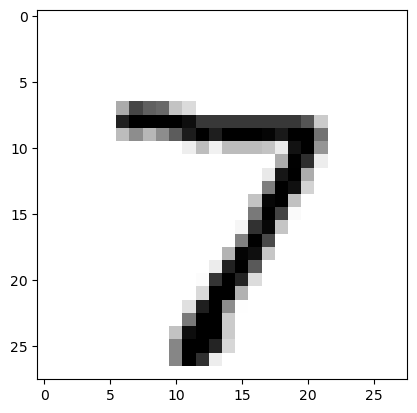

Predicted value: 7


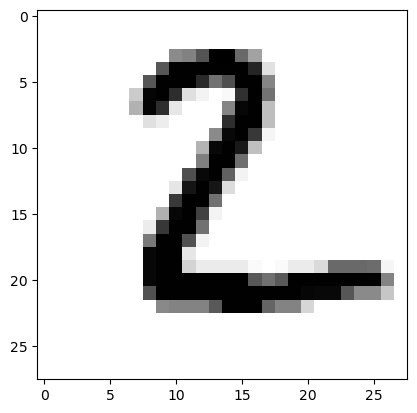

Predicted value: 2


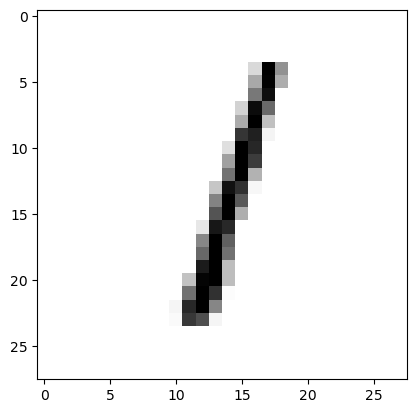

Predicted value: 1


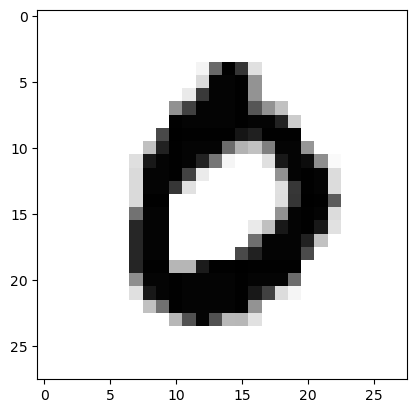

Predicted value: 0


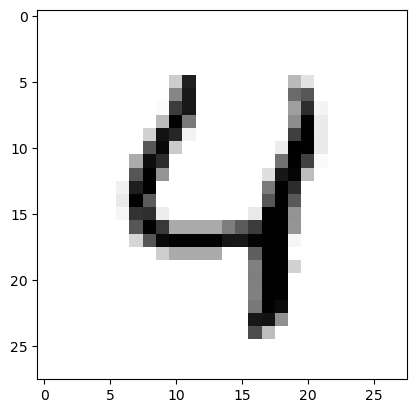

Predicted value: 4


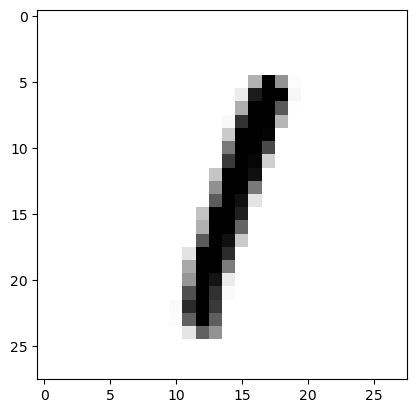

Predicted value: 1


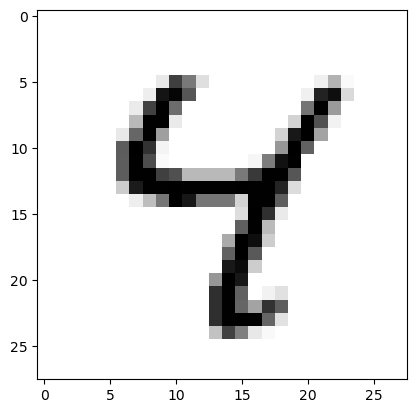

Predicted value: 4


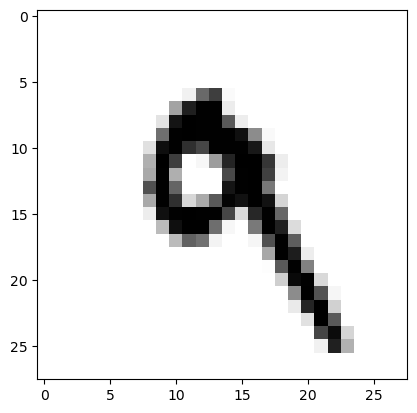

Predicted value: 9


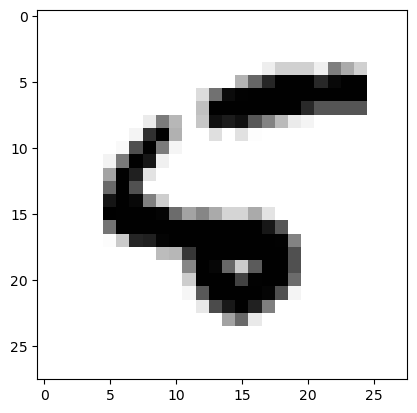

Predicted value: 5


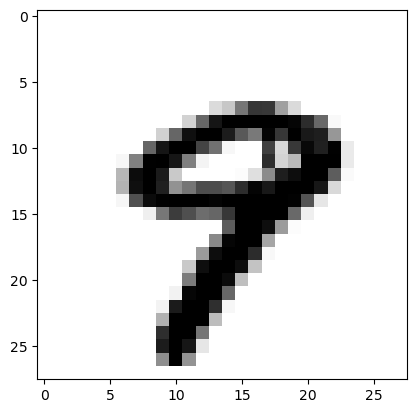

Predicted value: 9


In [21]:
for i in range(10):
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.show()
    print("Predicted value:", tf.argmax(predictions[i]).numpy())